In [1]:
% matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from functions_lib import CrowdCounter

In [2]:
# Initialize CrowCounter Class
crowd_detector = CrowdCounter()

In [3]:
# Library to read multiple files
img1, img2, img3 = crowd_detector.mutlifile_read('images/DJI_0273.JPG', 'images/DJI_0274.JPG', 'images/DJI_0276.JPG')

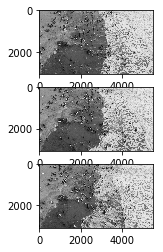

In [4]:
plt.subplot(3, 1, 1), plt.imshow(img1)
plt.subplot(3, 1, 2),plt.imshow(img2)
plt.subplot(3, 1, 3),plt.imshow(img3)
plt.show()

In [5]:
diff1, diff2, diff3 = crowd_detector.background_subtraction(img1, img2, img3)

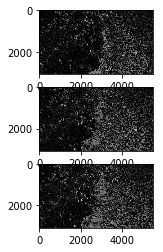

In [6]:
plt.subplot(3, 1, 1), plt.imshow(diff1)
plt.subplot(3, 1, 2),plt.imshow(diff2)
plt.subplot(3, 1, 3),plt.imshow(diff3)
plt.show()

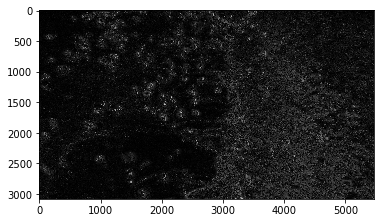

In [11]:
diff1 = crowd_detector.high_pass_filtering(diff1)
plt.imshow(diff1, cmap='gray'),plt.show()

In [12]:
crowd_detector.multifile_write(['diff1.jpg', diff1], ['diff2.jpg', diff2], ['diff3.jpg', diff3])

In [15]:
diff1 = cv2.imread('diff1.jpg', cv2.IMREAD_GRAYSCALE)
bin1 = cv2.threshold(diff1, 80, 255, cv2.THRESH_BINARY)
print bin1

(80.0, array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))


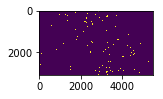

In [16]:
plt.subplot(3, 1, 1),plt.imshow(bin1[1])
# plt.subplot(3, 1, 2),plt.imshow(bin2[1])
# plt.subplot(3, 1, 3),plt.imshow(bin3[1])
plt.show()

In [19]:
crowd_detector.multifile_write(['bin1.jpg', bin1[1]])

In [ ]:
img = crowd_detector.mutlifile_read('bin1.jpg')

In [47]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
morphed = crowd_detector.morph_operations(kernel, img, "open")

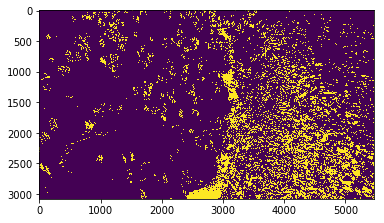

In [48]:
plt.imshow(morphed),plt.title('Morphed Image'),plt.show()

In [43]:
morphed = cv2.blur(morphed, (10, 10))
crowd_detector.multifile_write(['post-morph.jpg', morphed])


In [49]:
crowd_detector.blob_detect_set_params()
count_image, points =  crowd_detector.run_blob_detector(morphed, img1)

True

In [90]:
plt.imshow(count_image), plt.title('Detected People'+ str(points)), plt.show()
